In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [28]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [29]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [30]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [31]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"]
dengue["Month"] = pd.Categorical(dengue["Month"], categories=month_order, ordered=True)


<h1>Insight No.1</h1>

<h1> Dengue cases and deaths have fluctuated over the years, indicating periodic outbreaks.</h1>

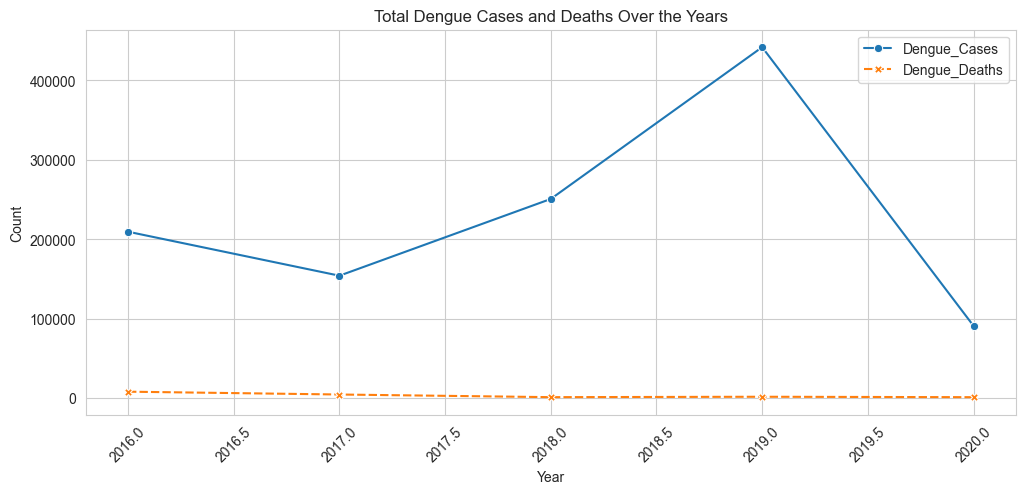

In [45]:
sns.set_style("whitegrid")

insights = []

yearly_data = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly_data, markers=True)
plt.title("Total Dengue Cases and Deaths Over the Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.2</h1>

<h1>Dengue cases tend to peak in certain months, suggesting seasonal patterns.</h1>

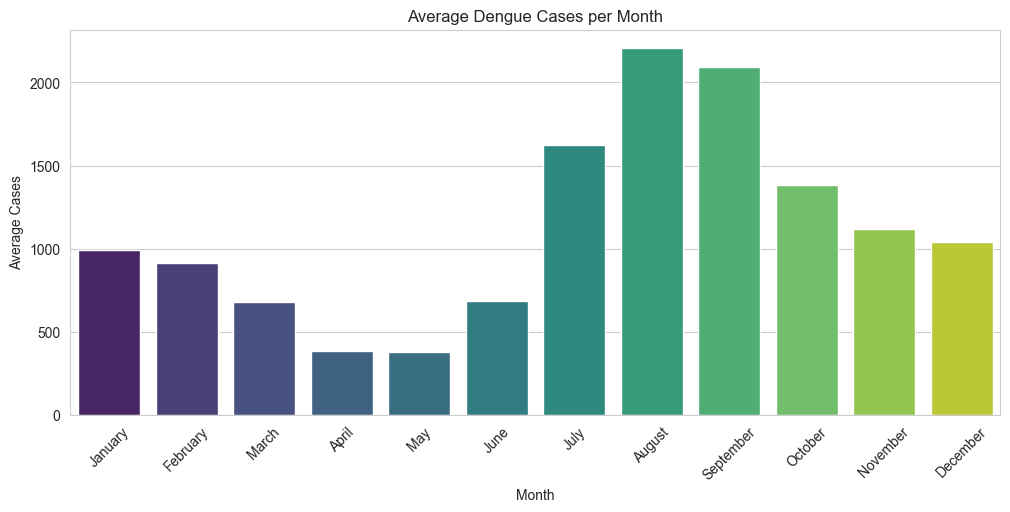

In [44]:
monthly_data = dengue.groupby("Month")["Dengue_Cases"].mean()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_data = monthly_data.reindex(month_order)

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_data.index, y=monthly_data.values, palette="viridis")
plt.title("Average Dengue Cases per Month")
plt.ylabel("Average Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.3</h1>

<h1>Certain regions report significantly higher dengue cases, indicating possible hotspots.</h1>

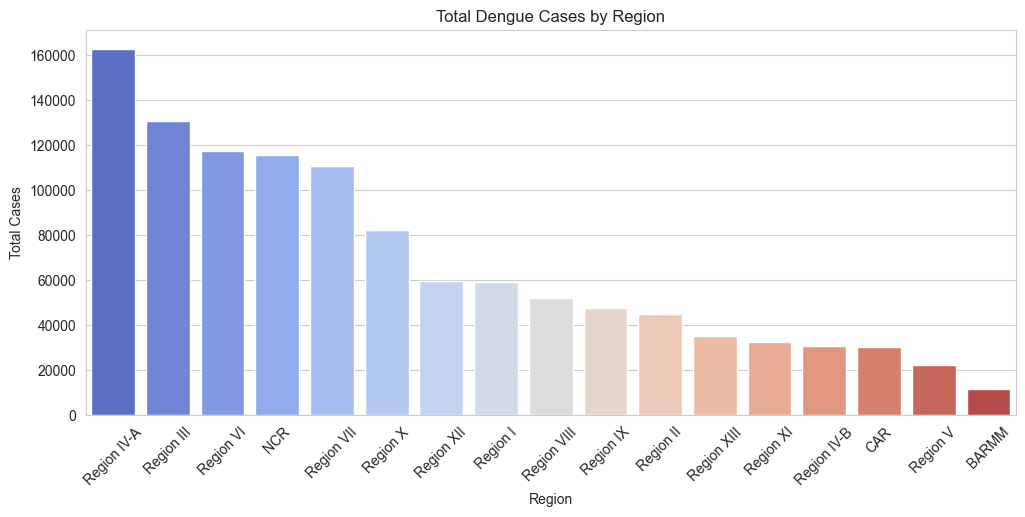

In [43]:
regional_data = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=regional_data.index, y=regional_data.values, palette="coolwarm")
plt.title("Total Dengue Cases by Region")
plt.ylabel("Total Cases")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.4</h1>

<h1>A positive correlation exists between dengue cases and deaths, but not all high-case periods lead to high fatalities.</h1>

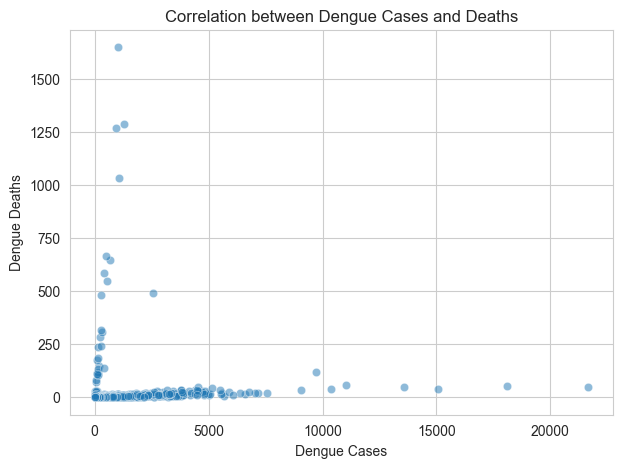

In [42]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5)
plt.title("Correlation between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1>Insight No.5</h1>

<h1> Some regions show a consistent increase in dengue cases over time, while others fluctuate.</h1>

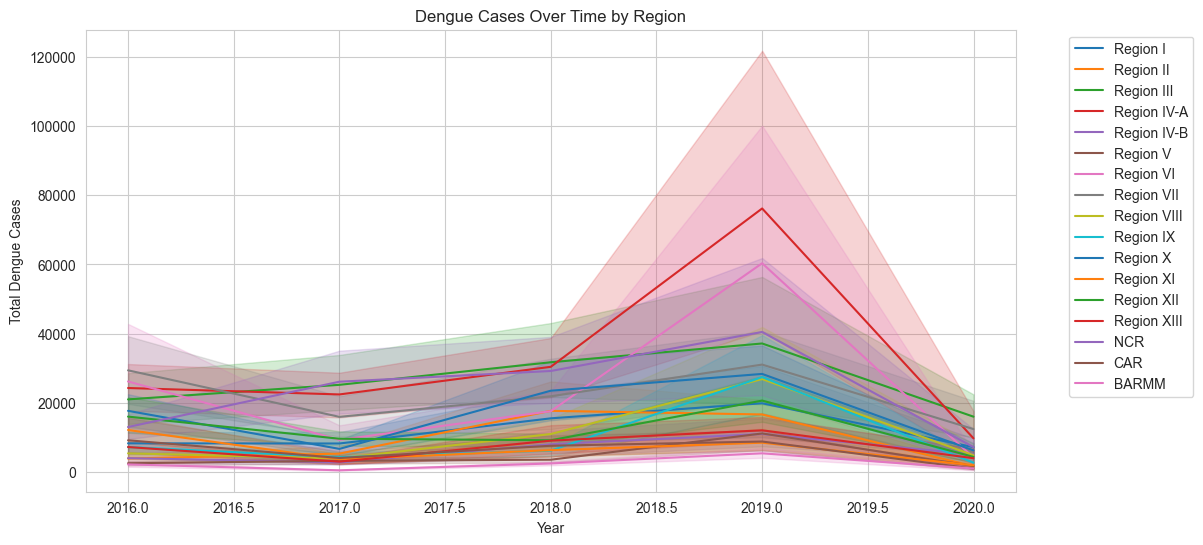

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dengue, x="Year", y="Dengue_Cases", hue="Region", estimator="sum", markers=True, palette="tab10")
plt.title("Dengue Cases Over Time by Region")
plt.ylabel("Total Dengue Cases")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h1>Insight No.6</h1>

<h1>Fatality rates fluctuate over the years, possibly due to healthcare improvements or outbreak severity.</h1>

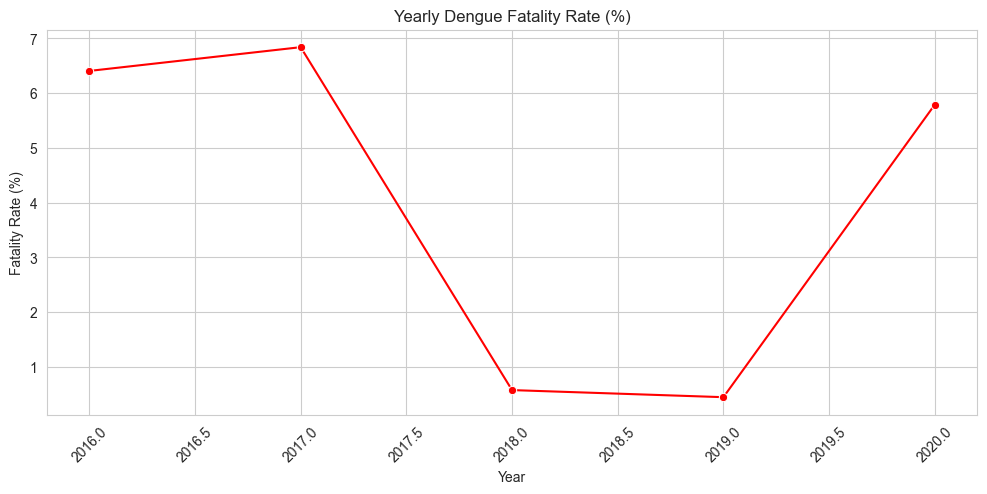

In [40]:
dengue["Fatality_Rate"] = (dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]) * 100
yearly_fatality = dengue.groupby("Year")["Fatality_Rate"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_fatality.index, y=yearly_fatality.values, marker="o", color="red")
plt.title("Yearly Dengue Fatality Rate (%)")
plt.ylabel("Fatality Rate (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.7</h1>

<h1> Certain months have a higher fatality rate, suggesting critical periods for medical preparedness.</h1>

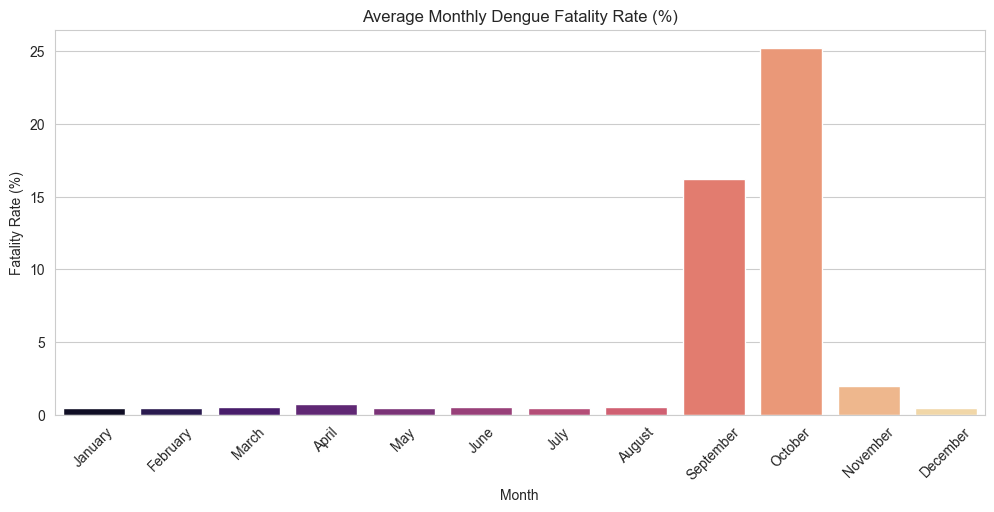

In [46]:
monthly_fatality = dengue.groupby("Month")["Fatality_Rate"].mean().reindex(month_order)

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_fatality.index, y=monthly_fatality.values, palette="magma")
plt.title("Average Monthly Dengue Fatality Rate (%)")
plt.ylabel("Fatality Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.8</h1>

<h1>Dengue outbreaks have extreme spikes in certain months, emphasizing the need for early intervention.</h1>

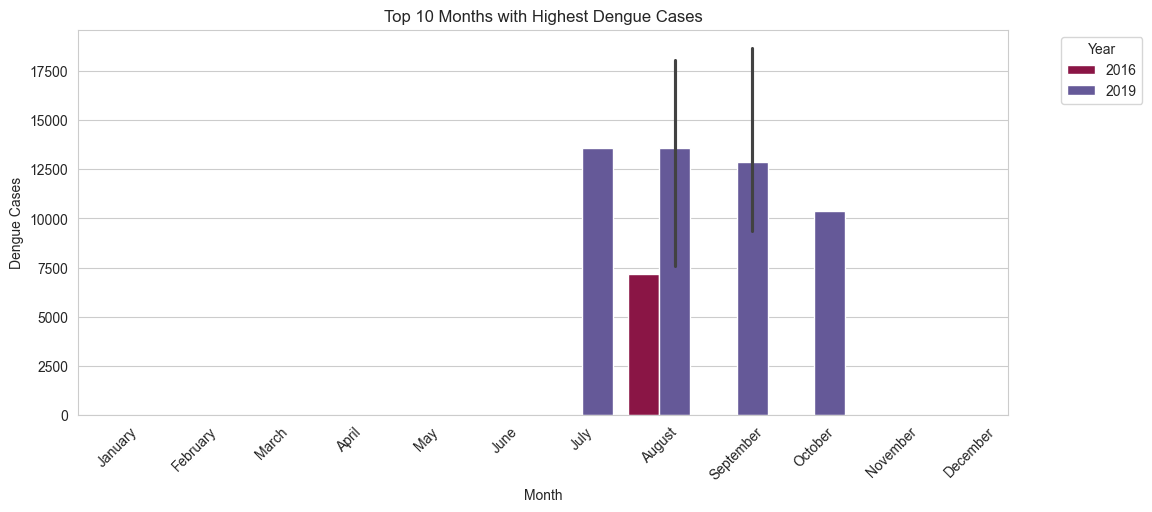

In [47]:
top_spike_months = dengue.nlargest(10, "Dengue_Cases")

plt.figure(figsize=(12, 5))
sns.barplot(x=top_spike_months["Month"], y=top_spike_months["Dengue_Cases"], hue=top_spike_months["Year"], palette="Spectral")
plt.title("Top 10 Months with Highest Dengue Cases")
plt.ylabel("Dengue Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h1>Insight No.9</h1>

<h1>Some regions have consistently higher fatality rates, indicating disparities in healthcare response.</h1>

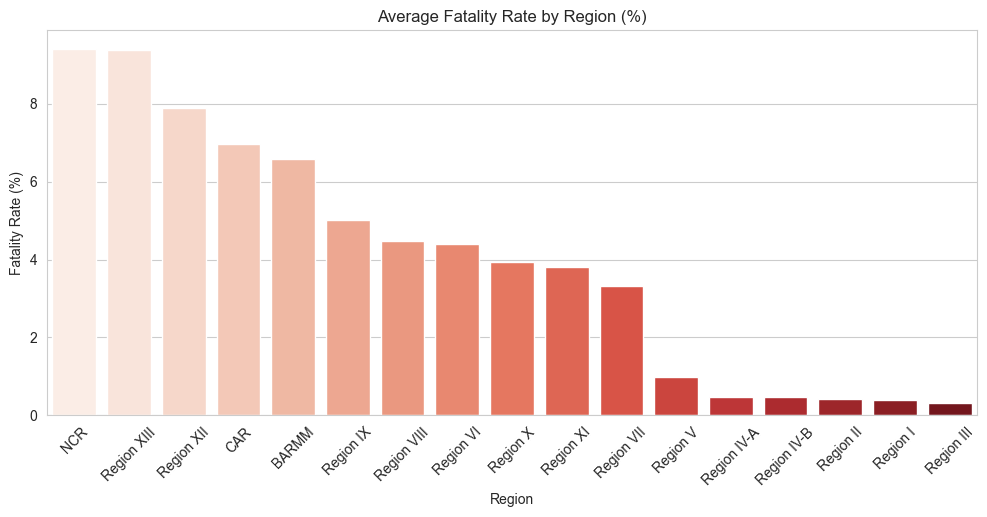

In [50]:
regional_fatality = dengue.groupby("Region")["Fatality_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=regional_fatality.index, y=regional_fatality.values, palette="Reds")
plt.title("Average Fatality Rate by Region (%)")
plt.ylabel("Fatality Rate (%)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.10</h1>

<h1>Dengue cases and deaths show synchronized trends, with fatalities following spikes in infections.</h1>

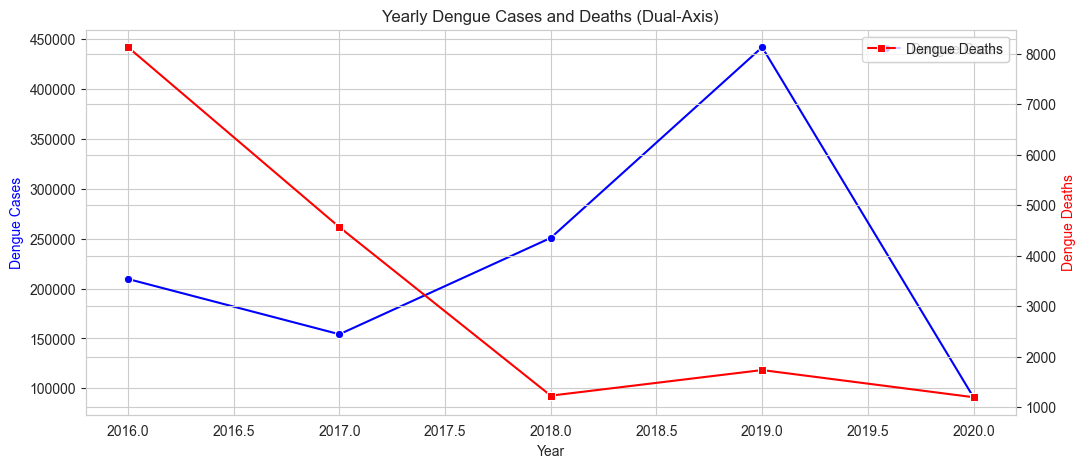

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()
sns.lineplot(data=yearly_data["Dengue_Cases"], marker="o", ax=ax1, color="blue", label="Dengue Cases")
sns.lineplot(data=yearly_data["Dengue_Deaths"], marker="s", ax=ax2, color="red", label="Dengue Deaths")

ax1.set_xlabel("Year")
ax1.set_ylabel("Dengue Cases", color="blue")
ax2.set_ylabel("Dengue Deaths", color="red")
plt.title("Yearly Dengue Cases and Deaths (Dual-Axis)")
plt.show()

<h1>Insight No.11</h1>

<h1> A few regions contribute disproportionately to the total dengue cases, requiring targeted interventions.</h1>

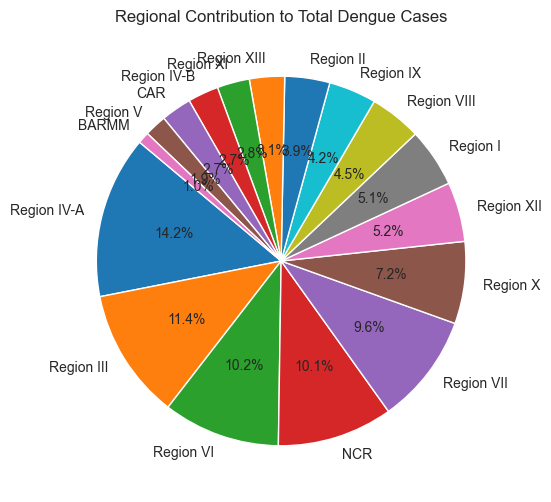

In [53]:
plt.figure(figsize=(10, 6))
plt.pie(regional_data, labels=regional_data.index, autopct='%1.1f%%', colors=sns.color_palette("tab10"), startangle=140)
plt.title("Regional Contribution to Total Dengue Cases")
plt.show()

<h1>Insight No.12</h1>

<h1>There is significant variation in monthly dengue cases across different years, suggesting inconsistent outbreak patterns.</h1>

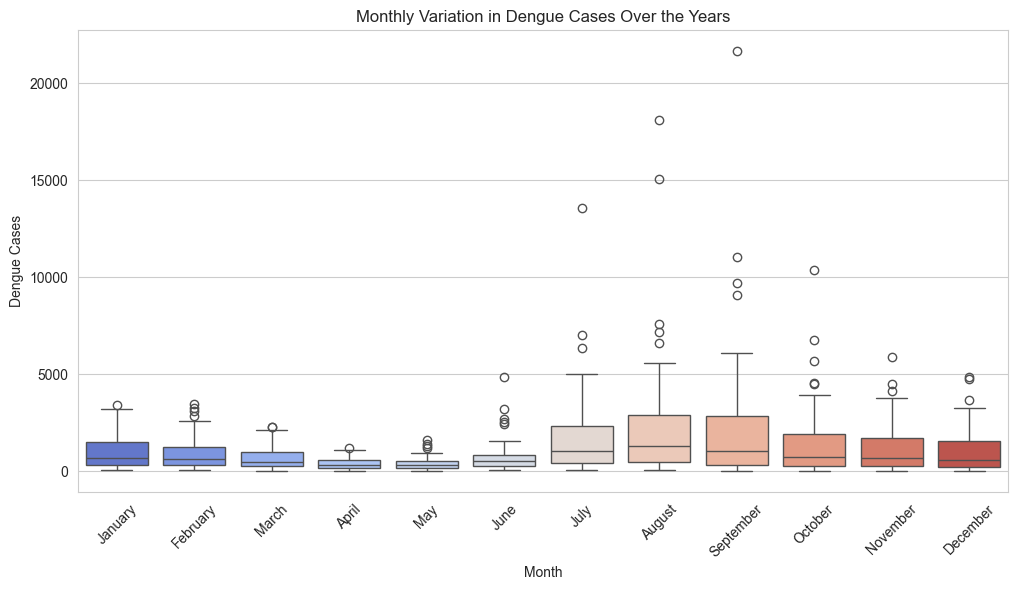

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dengue, x="Month", y="Dengue_Cases", palette="coolwarm", order=month_order)
plt.title("Monthly Variation in Dengue Cases Over the Years")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.13</h1>

<h1>Impact of Seasonality on Dengue Cases (Heatmap)</h1>

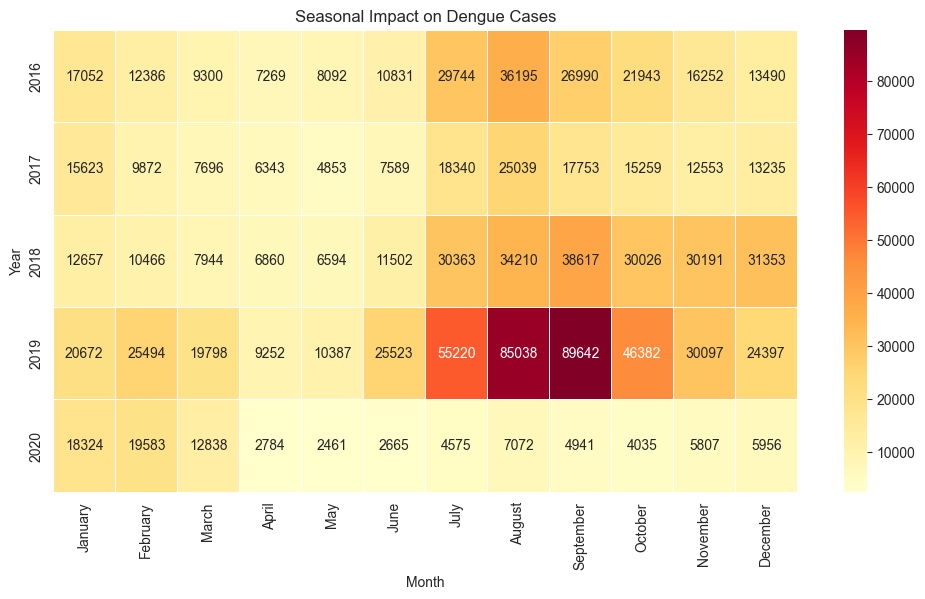

In [57]:
dengue_pivot = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Month", aggfunc="sum")
plt.figure(figsize=(12, 6))
sns.heatmap(dengue_pivot, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Seasonal Impact on Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

<h1>Insight No.14</h1>

<h1>Outliers in Dengue Cases (Boxplot)</h1>

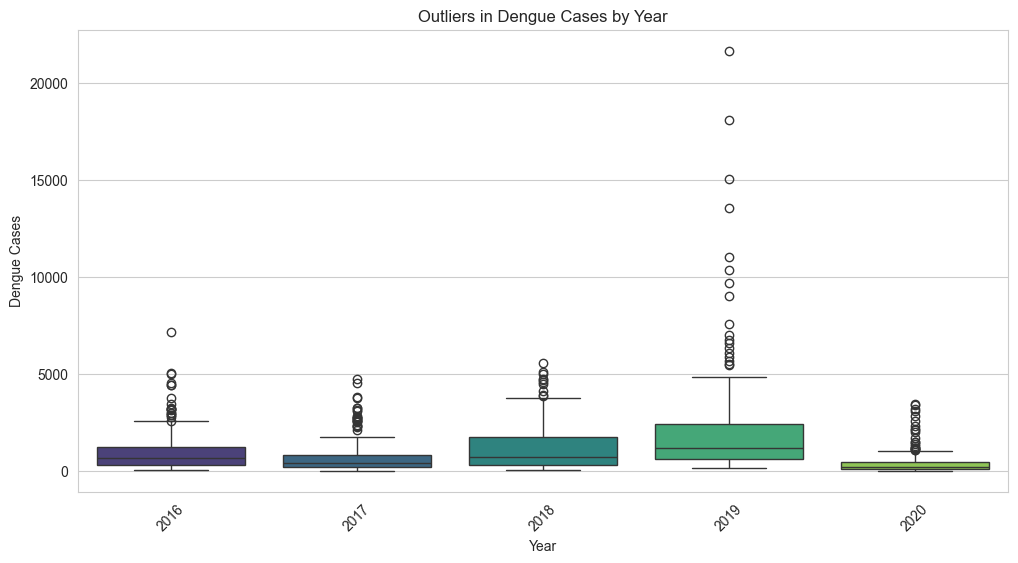

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dengue, x="Year", y="Dengue_Cases", palette="viridis")
plt.title("Outliers in Dengue Cases by Year")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.show()

<h1>Insight No.15</h1>

<h1>Dengue Case Fatality Rate Distribution</h1>

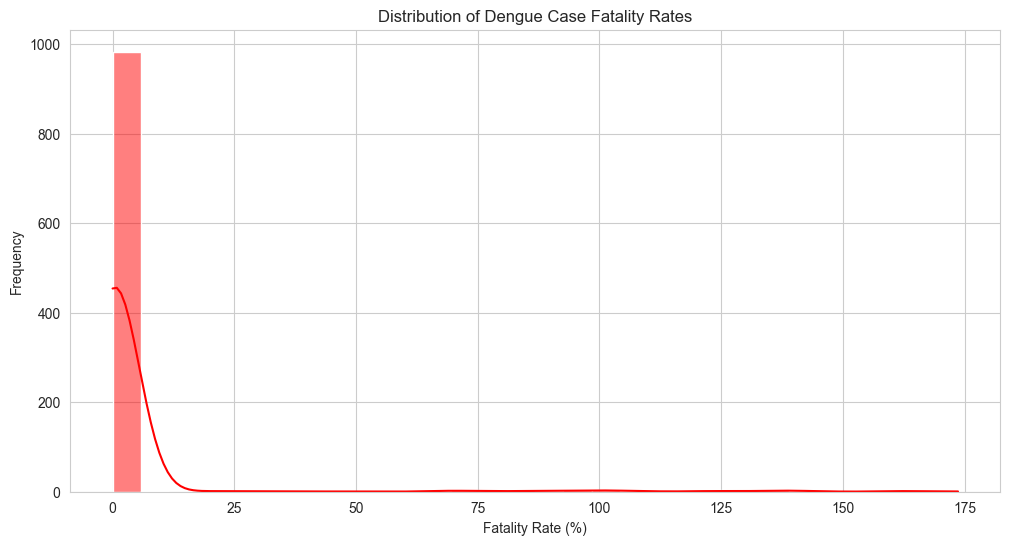

In [61]:
plt.figure(figsize=(12, 6))
dengue["Fatality_Rate"] = (dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]) * 100
sns.histplot(dengue["Fatality_Rate"], bins=30, kde=True, color="red")
plt.title("Distribution of Dengue Case Fatality Rates")
plt.xlabel("Fatality Rate (%)")
plt.ylabel("Frequency")
plt.show()